# Week 2 - 9th August, 2023

In [1]:
import warnings
warnings.filterwarnings('ignore')

Use the Bollywood Dataset to Answer Questions 1 to 12.

In [2]:
import pandas as pd
bollywood_df = pd.read_csv('./datasets/bollywood.csv')
bollywood_df.head(5)

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


### Q1. How many records are present in the dataset? Print the metadata information of the dataset.

In [3]:
len(bollywood_df)

149

### Q2. How many movies got released in each genre? Which genre had highest number of releases? Sort number of releases in each genre in descending order.

In [4]:
# movies release in each genre
bollywood_df['Genre'].value_counts()

Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: count, dtype: int64

In [5]:
# genre with the highest number of releases
bollywood_df['Genre'].value_counts().sort_values(ascending=False).head(1)

Genre
Comedy    36
Name: count, dtype: int64

In [6]:
# descending list of releases grouped by genre
bollywood_df['Genre'].value_counts().sort_values(ascending=False)

Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: count, dtype: int64

### Q3. How many movies in each genre got released in different release times like long weekend, festive season, etc.
(Hint: Do a cross tabulation between `Genre` and `ReleaseTime`.)

In [7]:
pd.crosstab(bollywood_df['Genre'], bollywood_df['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


### Q4. Which month of the year, maximum number movie releases are seen?
(Hint: Extract a new column called `month` from `ReleaseDate` column.)

In [8]:
bollywood_df['Month'] = bollywood_df['ReleaseDate'].map(lambda date: date.split('-')[1])
bollywood_df.groupby('Month').size().sort_values(ascending=False).head(1)

Month
Jan    20
dtype: int64

### Q5. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?

In [9]:
bollywood_df['Month'] = bollywood_df['ReleaseDate'].map(lambda date: date.split('-')[1])
bollywood_df[bollywood_df['Budget'] >= 25].groupby('Month').size().sort_values(ascending=False).head(1)

Month
Feb    9
dtype: int64

### Q6. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as `(BoxOfficeCollection – Budget) / Budget`.

In [10]:
roi = []
for i, row in bollywood_df.iterrows():
    roi.append((row['BoxOfficeCollection'] - row['Budget'])/row['Budget'])
bollywood_df['ROI'] = roi
bollywood_df.sort_values(by='ROI', ascending=False).head(10)

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,ROI
64,65,26-Apr-13,Aashiqui 2,N,Romance,12,110.0,2926673,4944,628,Apr,8.166667
89,90,19-Dec-14,PK,HS,Drama,85,735.0,13270623,43767,5693,Dec,7.647059
132,133,13-Sep-13,Grand Masti,LW,Comedy,35,298.0,1795640,3015,721,Sep,7.514286
135,136,20-Sep-13,The Lunchbox,N,Drama,10,85.0,1064854,4054,285,Sep,7.500000
87,88,14-Jun-13,Fukrey,N,Comedy,5,36.2,227912,222,39,Jun,6.240000
58,59,5-Sep-14,Mary Kom,N,Drama,15,104.0,6086811,26560,1647,Sep,5.933333
128,129,18-Oct-13,Shahid,FS,Drama,6,40.0,1148516,3155,396,Oct,5.666667
37,38,11-Jul-14,Humpty Sharma Ki Dulhania,N,Romance,20,130.0,6604595,14535,2208,Jul,5.500000
101,102,12-Jul-13,Bhaag Milkha Bhaag,N,Drama,30,164.0,2635390,4622,456,Jul,4.466667
115,116,9-Aug-13,Chennai Express,FS,Comedy,75,395.0,1882346,7954,1593,Aug,4.266667


### Q7. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

In [11]:
roi = []
for i, row in bollywood_df.iterrows():
    roi.append((row['BoxOfficeCollection'] - row['Budget'])/row['Budget'])
bollywood_df['ROI'] = roi
bollywood_df.sort_values(by='ROI', ascending=False).head(10)
bollywood_df.groupby('ReleaseTime')['ROI'].mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

### Q8. Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies.

(array([64., 40., 19., 11.,  4.,  4.,  2.,  2.,  1.,  2.]),
 array([  2. ,  16.8,  31.6,  46.4,  61.2,  76. ,  90.8, 105.6, 120.4,
        135.2, 150. ]),
 <BarContainer object of 10 artists>)

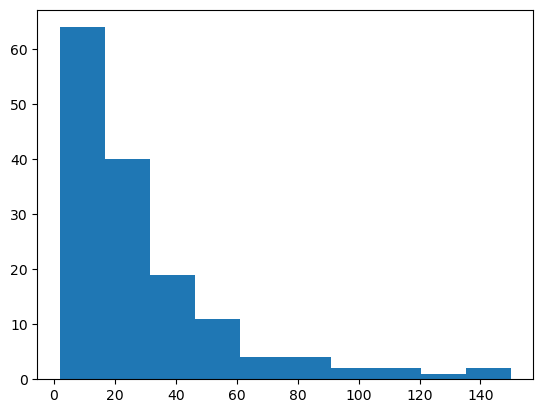

In [12]:
import matplotlib.pyplot as plt
plt.hist(bollywood_df['Budget'])

<Axes: xlabel='Budget', ylabel='Density'>

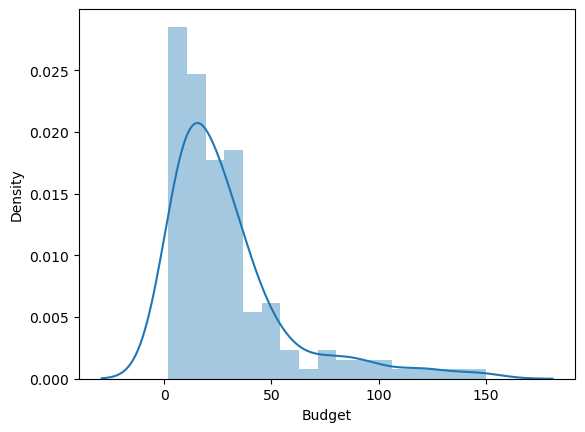

In [13]:
import seaborn as sn
sn.distplot(bollywood_df['Budget'])

### Q9. Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?

In [14]:
roi = []
for i, row in bollywood_df.iterrows():
    roi.append((row['BoxOfficeCollection'] - row['Budget'])/row['Budget'])
bollywood_df['ROI'] = roi
bollywood_df.head(5)

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,ROI
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,Apr,1.888889
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Jan,0.200000
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Jul,-0.600000
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Jan,-0.950000
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Jul,-0.400000


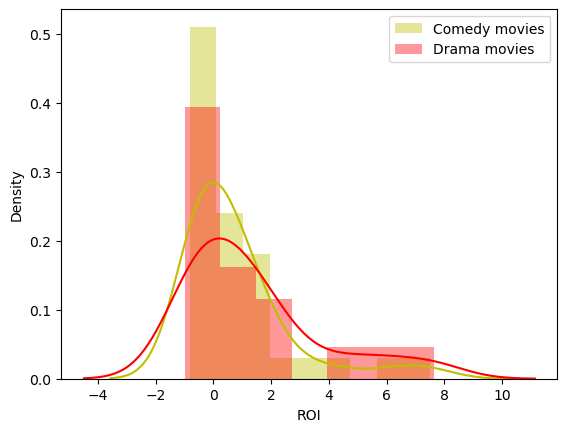

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.distplot(
    bollywood_df[bollywood_df['Genre'] == 'Comedy']
    ['ROI'],
    color='y',
    label='Comedy movies'
)

sn.distplot(
    bollywood_df[bollywood_df['Genre'] == ' Drama ']
    ['ROI'],
    color = 'r',
    label = 'Drama movies'
)

plt.legend()

### Q10. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

In [16]:
bollywood_df['YoutubeLikes'].corr(bollywood_df['BoxOfficeCollection'])

0.6825165877731297

### Q11. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

<Axes: title={'center': 'YoutubeLikes'}, xlabel='Genre'>

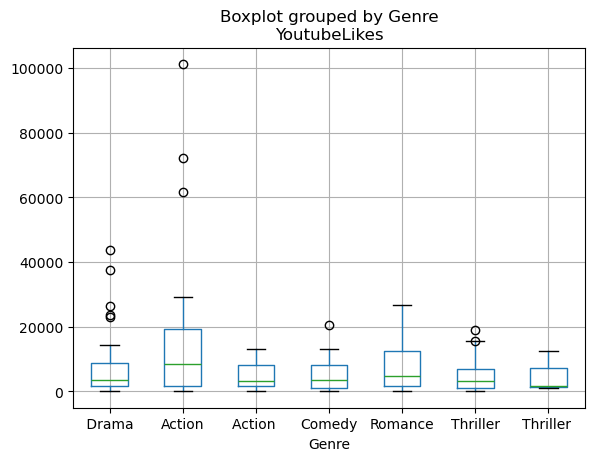

In [17]:
bollywood_df.boxplot(by='Genre', column=['YoutubeLikes'])

### Q12. Which of the variables among `Budget`, `BoxOfficeCollection`, `YoutubeView`, `YoutubeLikes`, `YoutubeDislikes` are highly correlated?
Note: Draw pair plot or heatmap.

<Axes: >

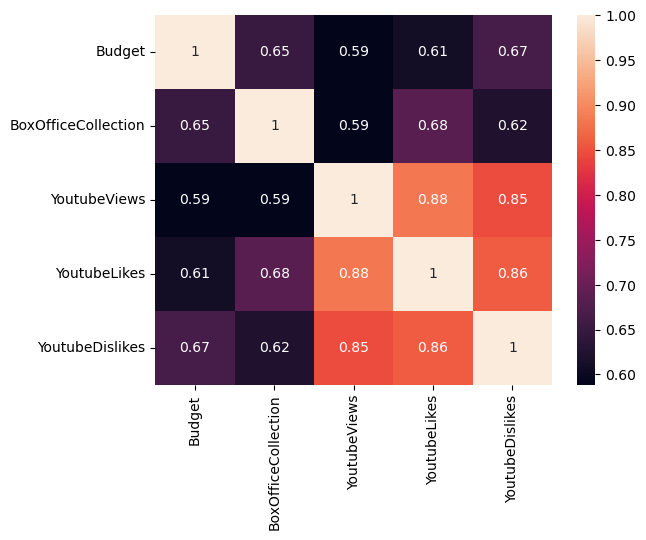

In [18]:
features = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']
sn.heatmap(bollywood_df[features].corr(), annot=True)

Use the SAheart Dataset to Answer Questions 13 to 20.

In [19]:
import pandas as pd
SAheart_df = pd.read_csv('./datasets/sa-heart.csv')
SAheart_df.head(5)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


### Q13. How many records are present in the dataset? Print the metadata information of the dataset

In [21]:
SAheart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


### Q14. Draw a bar plot to show the number of persons having CHD or not in comparison to they having family history of the disease or not

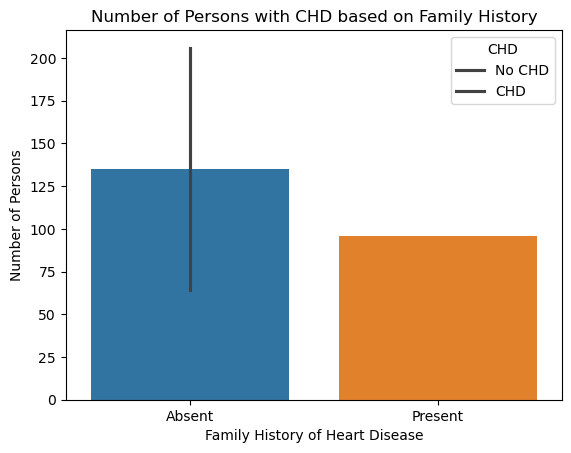

In [31]:
import matplotlib.pyplot as plt
import seaborn as sn

chd_famhist_count = SAheart_df.groupby(["chd", "famhist"]).size().unstack()
sn.barplot(data=chd_famhist_count)
plt.title("Number of Persons with CHD based on Family History")
plt.xlabel("Family History of Heart Disease")
plt.ylabel("Number of Persons")
plt.legend(title="CHD", labels=["No CHD", "CHD"])
plt.show()

### Q15. Does age have any correlation with sbp? Choose appropriate plot to show the relationship

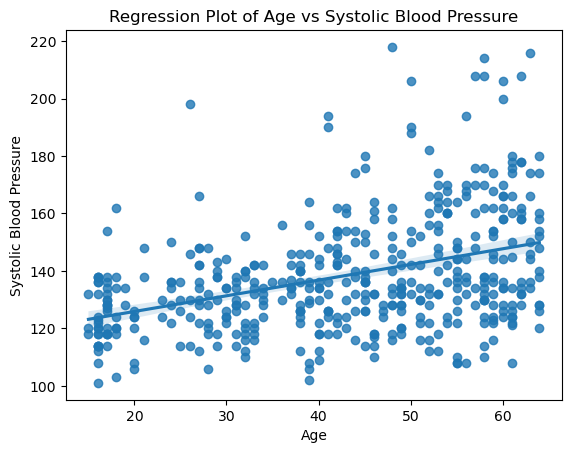

Correlation coefficient between age and sbp: 0.39


In [32]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.regplot(data=SAheart_df, x='age', y='sbp')
plt.title("Regression Plot of Age vs Systolic Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Systolic Blood Pressure")
plt.show()

# Calculating correlation coefficient
correlation = SAheart_df["age"].corr(SAheart_df["sbp"])
print(f"Correlation coefficient between age and sbp: {correlation:.2f}")

### Q16. Compare the distribution of tobacco consumption for persons having CHD and not having CHD

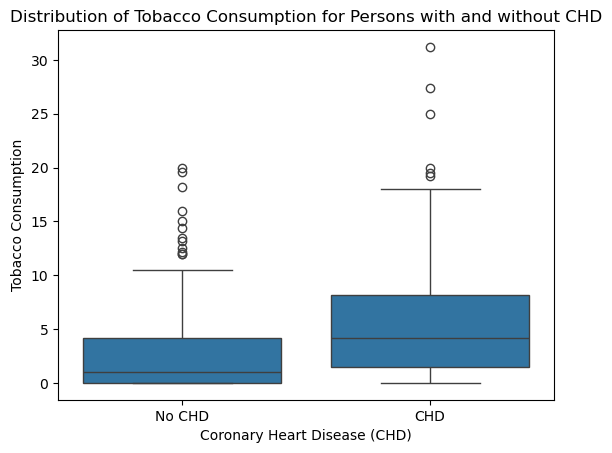

Mean Difference of people having chd or not with tobacco consumption is: 2.89


In [33]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.boxplot(data=SAheart_df, x="chd", y="tobacco")
plt.title("Distribution of Tobacco Consumption for Persons with and without CHD")
plt.xlabel("Coronary Heart Disease (CHD)")
plt.ylabel("Tobacco Consumption")
plt.xticks([0, 1], ["No CHD", "CHD"])
plt.show()

# Calculate statistics
tobacco_chd_no = SAheart_df[SAheart_df["chd"] == 0]["tobacco"]
tobacco_chd_yes = SAheart_df[SAheart_df["chd"] == 1]["tobacco"]

mean_diff = tobacco_chd_yes.mean() - tobacco_chd_no.mean()
print(f"Mean Difference of people having chd or not with tobacco consumption is: {mean_diff:.2f}")

### Q17. How are the parameters sbp, obesity, age and ldl correlated? Choose the right plot to show the relationships

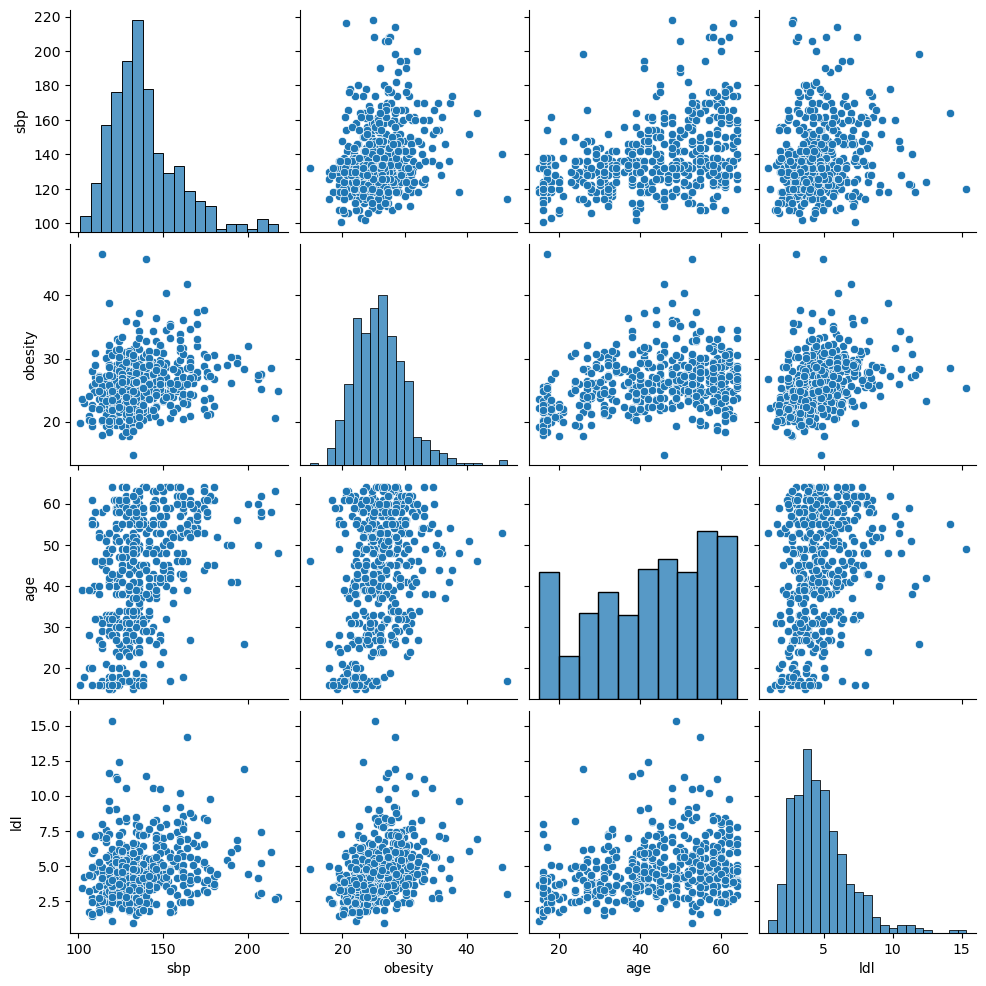

In [34]:
import matplotlib.pyplot as plt
import seaborn as sn

selected_vars = ["sbp", "obesity", "age", "ldl"]
sn.pairplot(SAheart_df[selected_vars])
plt.show()

### Q18. Derive a new column called `agegroup` from `age` column where persons falling in different age ranges are categorized as below
- (0–15): young
- (15–35): adults
- (35–55): mid
- (55–): old

In [39]:
def categoriseAge(age: int) -> str:
    if age in range(0, 15):
        return 'young'
    if age in range(15, 35):
        return 'adult'
    if age in range(35, 55):
        return 'mid'
    return 'old'

SAheart_df['agegroup'] = SAheart_df['age'].apply(categoriseAge)
SAheart_df.head(5)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,agegroup
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,mid
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,old
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,mid
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,old
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,mid


### Q19. Find out the number of CHD cases in different age categories. Do a barplot and sort them in the order of age groups

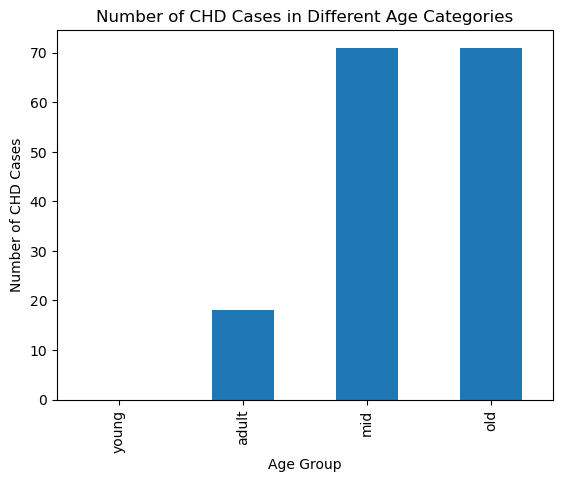

In [46]:
age_count_series = SAheart_df[SAheart_df['chd'] == 1]['agegroup'].value_counts()
age_order = ["young", "adult", "mid", "old"]
age_count_series = age_count_series.reindex(age_order)
age_count_series.plot(kind="bar")
plt.title("Number of CHD Cases in Different Age Categories")
plt.xlabel("Age Group")
plt.ylabel("Number of CHD Cases")
plt.show()

### Q20. Draw a box plot to compare distributions of `ldl` for different age groups

<Axes: xlabel='agegroup', ylabel='ldl'>

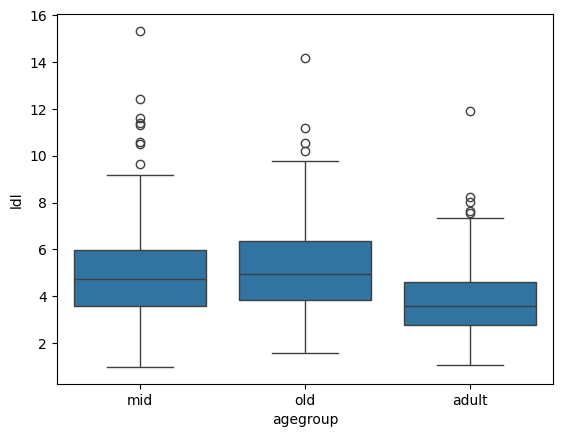

In [49]:
import seaborn as sn
sn.boxplot(data=SAheart_df, x="agegroup", y="ldl")